This Notebook will 'simply' learn to calculate a given number representing the degrees in Celcius to its Fahrenheit equivalent. 

In [1]:
#First we import numpy, tensorflow and finally matplotlib to visualise our training's loss
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Let the data's inputs consist of random numbers between -50 and 101
c_inputs = np.random.uniform(low=-50, high=101, size=(50,))
f_outputs = []

#We calculate the Fahrenheit equivalent for the expected output
for i in c_inputs:
  temp = (i * 1.8) + 32
  f_outputs.append(temp)

print(c_inputs)
print(f_outputs)

[-18.94040778 -29.83734459   3.91909541  91.81538899 -17.41009987
 -26.46462008  66.18968634  43.66552557  -1.36125666  25.45519766
 -34.47369722  51.09284912  77.75708905  81.01058652  88.60548855
   8.62305235 -48.39285838   2.85228953   9.87247571 -10.98499687
  74.77207918  10.80130997  94.71426123  47.94150806 -36.6592862
  34.44658849 -14.95739094 -42.73187747  38.1828939  -19.61490039
 -45.4651477   80.81987354 -33.75473985 -10.26119141 -45.63617715
 -13.36921866  13.14583657 -28.82379939  57.06549879 -42.51317586
  37.57925343   6.98093386   2.02159067 -13.75202152  76.31090032
  39.31843418 -42.83298871  19.51297589  -0.15189152  97.29189224]
[-2.0927340056299784, -21.70722026760182, 39.05437173122854, 197.26770018748084, 0.6618202407782512, -15.636316145612597, 151.14143542001563, 110.59794602381042, 29.549738018895088, 77.81935579486702, -30.05265498774841, 123.96712842234774, 171.9627602930452, 177.81905573672452, 191.48987939322302, 47.52149423580258, -55.107145088937784, 

I am pretty happy with how those numbers look. For example I get 51.96240032 (C) as 125.53232058104756 (F) which is correct.

In [2]:
#We convert our datasets now to np.arrays for optimum usage. They are much more memory efficient, they don't call other Python objects
#The added bonus is that we get access to matrix and vector functions built-in
c_inputs_np = np.array(c_inputs, dtype=float)
f_outputs_np = np.array(f_outputs, dtype=float)

#We're using a simple 1 layered Sequential model because we have a simple 1 input and 1 output dataset
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential(layer)

#The loss function is important as it will indicate how well our model above is performing. We want a low Mean Squared Error.
#Adam is a way for the model to optimize itself during training where it looks to see how close its guess is to what is expected.
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
#Fit does the actual training and does it for the number of epochs (sounds epic, just means iterations)
history = model.fit(c_inputs_np, f_outputs_np, epochs=500, verbose=False)
print("Finished training")

Finished training


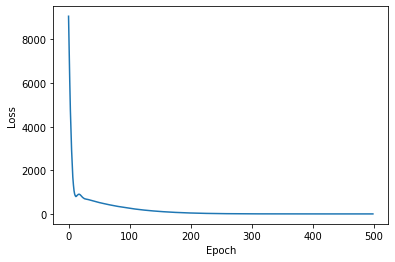

In [3]:
#Let's have a look at how we did on our training
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

Pretty good we're getting very close to 0 in our loss.

In [4]:
#Let's do a prediction on our model. One of my favourites is -40 because it's the same in Celsius and Fahrenheit
print(model.predict([-40.0]))

[[-40.088573]]


I am very happy with that. 

In [5]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.8004622]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([31.92992], dtype=float32)>]


In [6]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '../Models/CtoF')